# data.txt verilerini .csv formatına çevirme

In [1]:
import csv

label = []

with open("data2.txt", "r", encoding="utf-8") as file:
    veri_seti = file.readlines()

    for satir in veri_seti:
        veriler = satir.split(';')
        
        for veri in veriler:
            etiket_deger = veri.strip().split(' ')
            etiket = etiket_deger[0]
            deger = ' '.join(etiket_deger[1:])
            if etiket != '':
                if etiket not in label:
                    label.append(etiket)

# CSV dosyasına yazma işlemi
with open("output2.csv", "w", newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)

    # İlk satır olarak etiketleri yaz
    writer.writerow(label)

    with open("data2.txt", "r", encoding="utf-8") as file:
        veri_seti = file.readlines()

        for satir in veri_seti:
            veriler = satir.split(';')

            # Satırdaki etiketleri ve değerleri kontrol et
            satir_degerleri = [''] * len(label)  # Her etiket için bir değer listesi
            for veri in veriler:
                etiket_deger = veri.strip().split(' ')
                etiket = etiket_deger[0]
                deger = ' '.join(etiket_deger[1:])

                # Eğer etiket label listesinde varsa, değeri ilgili indekse ekle
                if etiket in label:
                    indeks = label.index(etiket)
                    satir_degerleri[indeks] = deger

            # CSV dosyasına satırı yaz
            writer.writerow(satir_degerleri)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
airfry = pd.read_csv('output2.csv')

In [4]:
airfry.head()

,Ek_Özellikler,Güç_W,Çıkarılabilir_Hazne,Zamanlayıcı,Kapasite,Hazne_Sayısı,Türü,Kontrol_Paneli,price,marka,Renk,Materyal,Yağ
0,LED Ekran,1500.0,Var,Var,"3 - 3,9 lt",Tek,Yağsız_Airfryer,Dokunmatik,1.990,Xiaomi,NaN,NaN,NaN
1,Isı Ayarı,1500.0,Var,Var,"3 - 3,9 lt",Tek,Yağsız_Airfryer,Mekanik,989.000,Altus,Siyah,Plastik,NaN
2,Zamanlayıcı,1800.0,Var,Var,NaN,Çift,Yağsız_Airfryer,Dokunmatik,8.899,Tefal,NaN,Plastik,NaN
3,Zamanlayıcı,1800.0,Var,Var,NaN,Çift,Yağsız_Airfryer,Dokunmatik,4.963,Tefal,NaN,Plastik,NaN
4,NaN,1700.0,Var,NaN,"5 - 5,9 lt",NaN,NaN,NaN,4.799,Philips,NaN,NaN,NaN


In [5]:
labels_to_drop = ['Yağ','Materyal','Renk','Ek_Özellikler']
airfry = airfry.drop(labels_to_drop, axis=1)

In [6]:
airfry.head()

,Güç_W,Çıkarılabilir_Hazne,Zamanlayıcı,Kapasite,Hazne_Sayısı,Türü,Kontrol_Paneli,price,marka
0,1500.0,Var,Var,"3 - 3,9 lt",Tek,Yağsız_Airfryer,Dokunmatik,1.990,Xiaomi
1,1500.0,Var,Var,"3 - 3,9 lt",Tek,Yağsız_Airfryer,Mekanik,989.000,Altus
2,1800.0,Var,Var,NaN,Çift,Yağsız_Airfryer,Dokunmatik,8.899,Tefal
3,1800.0,Var,Var,NaN,Çift,Yağsız_Airfryer,Dokunmatik,4.963,Tefal
4,1700.0,Var,NaN,"5 - 5,9 lt",NaN,NaN,NaN,4.799,Philips


In [7]:
airfry.isna().sum()

Güç_W                    2
Çıkarılabilir_Hazne      1
Zamanlayıcı            384
Kapasite               322
Hazne_Sayısı           344
Türü                   352
Kontrol_Paneli         356
price                    1
marka                    1
dtype: int64

In [8]:
airfry.describe()

,Güç_W,price
count,1219.000000,1220.000000
mean,1580.947498,25.702557
std,635.324659,113.072101
min,225.000000,1.049000
25%,1200.000000,2.898500
50%,1500.000000,4.449000
75%,1800.000000,7.524250
max,8000.000000,999.000000


In [9]:
# Aşırı değerleri tespit et
Q1 = airfry['price'].quantile(0.25)
Q3 = airfry['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = (airfry['price'] < Q1 - 1.5 * IQR) | (airfry['price'] > Q3 + 1.5 * IQR)

# Aşırı değerleri içermeyen yeni bir veri seti oluştur
cleaned_airfry = airfry[~outliers]

airfry = cleaned_airfry

In [10]:
# Aşırı değerleri tespit et (Güç_W sütunu için)
Q1_power = airfry['Güç_W'].quantile(0.25)
Q3_power = airfry['Güç_W'].quantile(0.75)
IQR_power = Q3_power - Q1_power

outliers_power = (airfry['Güç_W'] < Q1_power - 1.5 * IQR_power) | (airfry['Güç_W'] > Q3_power + 1.5 * IQR_power)

# Aşırı değerleri içermeyen yeni bir veri seti oluştur (Güç_W sütunu için)
cleaned_airfry_power = airfry[~outliers_power]

# Temizlenmiş veriyi orijinal veri setinin yerine geçir (Güç_W sütunu için)
airfry['Güç_W'] = cleaned_airfry_power['Güç_W']

In [11]:
airfry.describe()

,Güç_W,price
count,1062.000000,1111.000000
mean,1517.664783,4.995614
std,388.898137,3.071741
min,700.000000,1.049000
25%,1207.500000,2.789500
50%,1500.000000,4.102000
75%,1750.000000,6.155000
max,2600.000000,14.390000


In [12]:
from sklearn.impute import SimpleImputer

# Sayısal sütunlardaki eksik değerleri doldur
numeric_cols = ['Güç_W', 'price']
numeric_imputer = SimpleImputer(strategy='mean')  # Ya da 'median' kullanabilirsiniz
airfry[numeric_cols] = numeric_imputer.fit_transform(airfry[numeric_cols])

In [13]:
airfry.isna().sum()

Güç_W                    0
Çıkarılabilir_Hazne      1
Zamanlayıcı            322
Kapasite               283
Hazne_Sayısı           286
Türü                   295
Kontrol_Paneli         299
price                    0
marka                    1
dtype: int64

In [14]:
airfry = airfry.dropna(subset=['Çıkarılabilir_Hazne'])

In [15]:
airfry.isna().sum()

Güç_W                    0
Çıkarılabilir_Hazne      0
Zamanlayıcı            321
Kapasite               282
Hazne_Sayısı           285
Türü                   294
Kontrol_Paneli         298
price                    0
marka                    0
dtype: int64

In [16]:
categorical_cols = [ 'Zamanlayıcı', 'Kapasite', 'Hazne_Sayısı', 'Kontrol_Paneli','Türü']

for col in categorical_cols:
    most_frequent_value = airfry[col].mode()[0]
    airfry[col].fillna(most_frequent_value, inplace=True)


C:\Users\batur\AppData\Local\Temp\ipykernel_27056\3216433426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airfry[col].fillna(most_frequent_value, inplace=True)


In [17]:
airfry.isna().sum()

Güç_W                  0
Çıkarılabilir_Hazne    0
Zamanlayıcı            0
Kapasite               0
Hazne_Sayısı           0
Türü                   0
Kontrol_Paneli         0
price                  0
marka                  0
dtype: int64

In [18]:
airfry['Türü'].value_counts()

Türü
Yağsız_Airfryer      809
Yağlı                222
Yağsız (Airfryer)     80
Name: count, dtype: int64

In [19]:
airfry['Türü'].replace('Yağsız (Airfryer)', 'Yağsız_Airfryer', inplace=True)

C:\Users\batur\AppData\Local\Temp\ipykernel_27056\3451977063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airfry['Türü'].replace('Yağsız (Airfryer)', 'Yağsız_Airfryer', inplace=True)


In [20]:
airfry['Türü'].value_counts()

Türü
Yağsız_Airfryer    889
Yağlı              222
Name: count, dtype: int64

In [21]:
airfry.isna().sum()

Güç_W                  0
Çıkarılabilir_Hazne    0
Zamanlayıcı            0
Kapasite               0
Hazne_Sayısı           0
Türü                   0
Kontrol_Paneli         0
price                  0
marka                  0
dtype: int64

In [22]:
airfry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111 entries, 0 to 1220
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Güç_W                1111 non-null   float64
 1   Çıkarılabilir_Hazne  1111 non-null   object 
 2   Zamanlayıcı          1111 non-null   object 
 3   Kapasite             1111 non-null   object 
 4   Hazne_Sayısı         1111 non-null   object 
 5   Türü                 1111 non-null   object 
 6   Kontrol_Paneli       1111 non-null   object 
 7   price                1111 non-null   float64
 8   marka                1111 non-null   object 
dtypes: float64(2), object(7)
memory usage: 86.8+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluşturun
label_encoder = LabelEncoder()
airfry['Kapasite']
# "Zamanlayıcı" sütununu Label Encoding uygulayın
airfry['Kapasite'] = label_encoder.fit_transform(airfry['Kapasite'])

# Sonuçları gösterin
airfry['Kapasite']

C:\Users\batur\AppData\Local\Temp\ipykernel_27056\467222605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airfry['Kapasite'] = label_encoder.fit_transform(airfry['Kapasite'])


0       3
2       6
3       6
4       5
5       6
       ..
1216    6
1217    6
1218    6
1219    4
1220    6
Name: Kapasite, Length: 1111, dtype: int32

In [24]:
airfry['Hazne_Sayısı'].value_counts()

Hazne_Sayısı
Tek     1048
Çift      61
Üçlü       2
Name: count, dtype: int64

In [25]:
# 'Hazne_Sayısı' sütununda 'Üçlü' değeri olan satırları filtrele
airfry = airfry[airfry['Hazne_Sayısı'] != 'Üçlü']

In [26]:
airfry['Hazne_Sayısı'].value_counts()

Hazne_Sayısı
Tek     1048
Çift      61
Name: count, dtype: int64

In [27]:
airfry['Hazne_Sayısı'] = airfry['Hazne_Sayısı'].astype('category')
print(airfry['Hazne_Sayısı'].unique())
airfry['Hazne_Sayısı'] = airfry['Hazne_Sayısı'].map({'Tek': 1, 'Çift': 0})

['Tek', 'Çift']
Categories (2, object): ['Tek', 'Çift']


In [28]:
airfry['Zamanlayıcı'] = airfry['Zamanlayıcı'].astype('category')
print(airfry['Zamanlayıcı'].unique())
airfry['Zamanlayıcı'] = airfry['Zamanlayıcı'].map({'Var': 1, 'Yok': 0})

['Var', 'Yok']
Categories (2, object): ['Var', 'Yok']


In [29]:
airfry['Çıkarılabilir_Hazne'] = airfry['Çıkarılabilir_Hazne'].astype('category')
print(airfry['Çıkarılabilir_Hazne'].unique())
airfry['Çıkarılabilir_Hazne'] = airfry['Çıkarılabilir_Hazne'].map({'Var': 1, 'Yok': 0})

['Var', 'Yok']
Categories (2, object): ['Var', 'Yok']


In [30]:
airfry['Türü'] = airfry['Türü'].astype('category')
print(airfry['Türü'].unique())
airfry['Türü'] = airfry['Türü'].map({'Yağsız_Airfryer': 1, 'Yağlı': 0})

['Yağsız_Airfryer', 'Yağlı']
Categories (2, object): ['Yağlı', 'Yağsız_Airfryer']


In [31]:
airfry['Kontrol_Paneli'] = airfry['Kontrol_Paneli'].astype('category')
print(airfry['Kontrol_Paneli'].unique())
airfry['Kontrol_Paneli'] = airfry['Kontrol_Paneli'].map({'Dokunmatik': 1, 'Mekanik': 0})

['Dokunmatik', 'Mekanik']
Categories (2, object): ['Dokunmatik', 'Mekanik']


In [32]:
airfry_encoded = pd.get_dummies(airfry)

In [33]:
airfry

,Güç_W,Çıkarılabilir_Hazne,Zamanlayıcı,Kapasite,Hazne_Sayısı,Türü,Kontrol_Paneli,price,marka
0,1500.0,1,1,3,1,1,1,1.990,Xiaomi
2,1800.0,1,1,6,0,1,1,8.899,Tefal
3,1800.0,1,1,6,0,1,1,4.963,Tefal
4,1700.0,1,1,5,1,1,1,4.799,Philips
5,2225.0,1,1,6,1,1,1,6.199,Philips
...,...,...,...,...,...,...,...,...,...
1216,1800.0,1,1,6,1,1,1,2.499,Yui
1217,1700.0,1,1,6,1,1,1,1.999,Hutt
1218,1500.0,1,1,6,1,1,1,1.798,Kumtel
1219,1550.0,1,1,4,1,1,0,2.897,Tefal


In [34]:
# 'marka' sütununun frekanslarına bakma
marka_frekanslari = airfry['marka'].value_counts()

# Belirli bir sıklığı aşan markaları seçme
populer_markalar = marka_frekanslari[marka_frekanslari > 14].index

# 'marka' sütununu güncelleme
airfry['marka'] = airfry['marka'].apply(lambda x: x if x in populer_markalar else 'Diğer')

In [35]:
# 'marka' sütununu one-hot encode et
airfry = pd.get_dummies(airfry, columns=['marka'], prefix='marka')

# airfry_encoded'i incele
airfry_encoded.head()

,Güç_W,Kapasite,price,Çıkarılabilir_Hazne_1,Çıkarılabilir_Hazne_0,Zamanlayıcı_1,Zamanlayıcı_0,Hazne_Sayısı_1,Hazne_Sayısı_0,Türü_0,...,marka_Yasomi,marka_Youban,marka_Yui,marka_Zilan,marka_Zshskj,marka_Zwilling,marka_uKumtel,marka_Çok,marka_Ördekçioğlu,marka_Üret
0,1500.0,3,1.990,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1800.0,6,8.899,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1800.0,6,4.963,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1700.0,5,4.799,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2225.0,6,6.199,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
airfry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1109 entries, 0 to 1220
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Güç_W                1109 non-null   float64 
 1   Çıkarılabilir_Hazne  1109 non-null   category
 2   Zamanlayıcı          1109 non-null   category
 3   Kapasite             1109 non-null   int32   
 4   Hazne_Sayısı         1109 non-null   category
 5   Türü                 1109 non-null   category
 6   Kontrol_Paneli       1109 non-null   category
 7   price                1109 non-null   float64 
 8   marka_Arçelik        1109 non-null   bool    
 9   marka_Diğer          1109 non-null   bool    
 10  marka_Goldmaster     1109 non-null   bool    
 11  marka_Karaca         1109 non-null   bool    
 12  marka_Kenwood        1109 non-null   bool    
 13  marka_Kiwi           1109 non-null   bool    
 14  marka_Kumtel         1109 non-null   bool    
 15  marka_Onvo           1109 

In [37]:
airfry.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1109 entries, 0 to 1220
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Güç_W                1109 non-null   float64 
 1   Çıkarılabilir_Hazne  1109 non-null   category
 2   Zamanlayıcı          1109 non-null   category
 3   Kapasite             1109 non-null   int32   
 4   Hazne_Sayısı         1109 non-null   category
 5   Türü                 1109 non-null   category
 6   Kontrol_Paneli       1109 non-null   category
 7   price                1109 non-null   float64 
 8   marka_Arçelik        1109 non-null   bool    
 9   marka_Diğer          1109 non-null   bool    
 10  marka_Goldmaster     1109 non-null   bool    
 11  marka_Karaca         1109 non-null   bool    
 12  marka_Kenwood        1109 non-null   bool    
 13  marka_Kiwi           1109 non-null   bool    
 14  marka_Kumtel         1109 non-null   bool    
 15  marka_Onvo           1109 

C:\Users\batur\AppData\Local\Temp\ipykernel_27056\764064802.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airfry[columns[index]], ax=ax[i][j], bins=20)
C:\Users\batur\AppData\Local\Temp\ipykernel_27056\764064802.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airfry[columns[index]], 

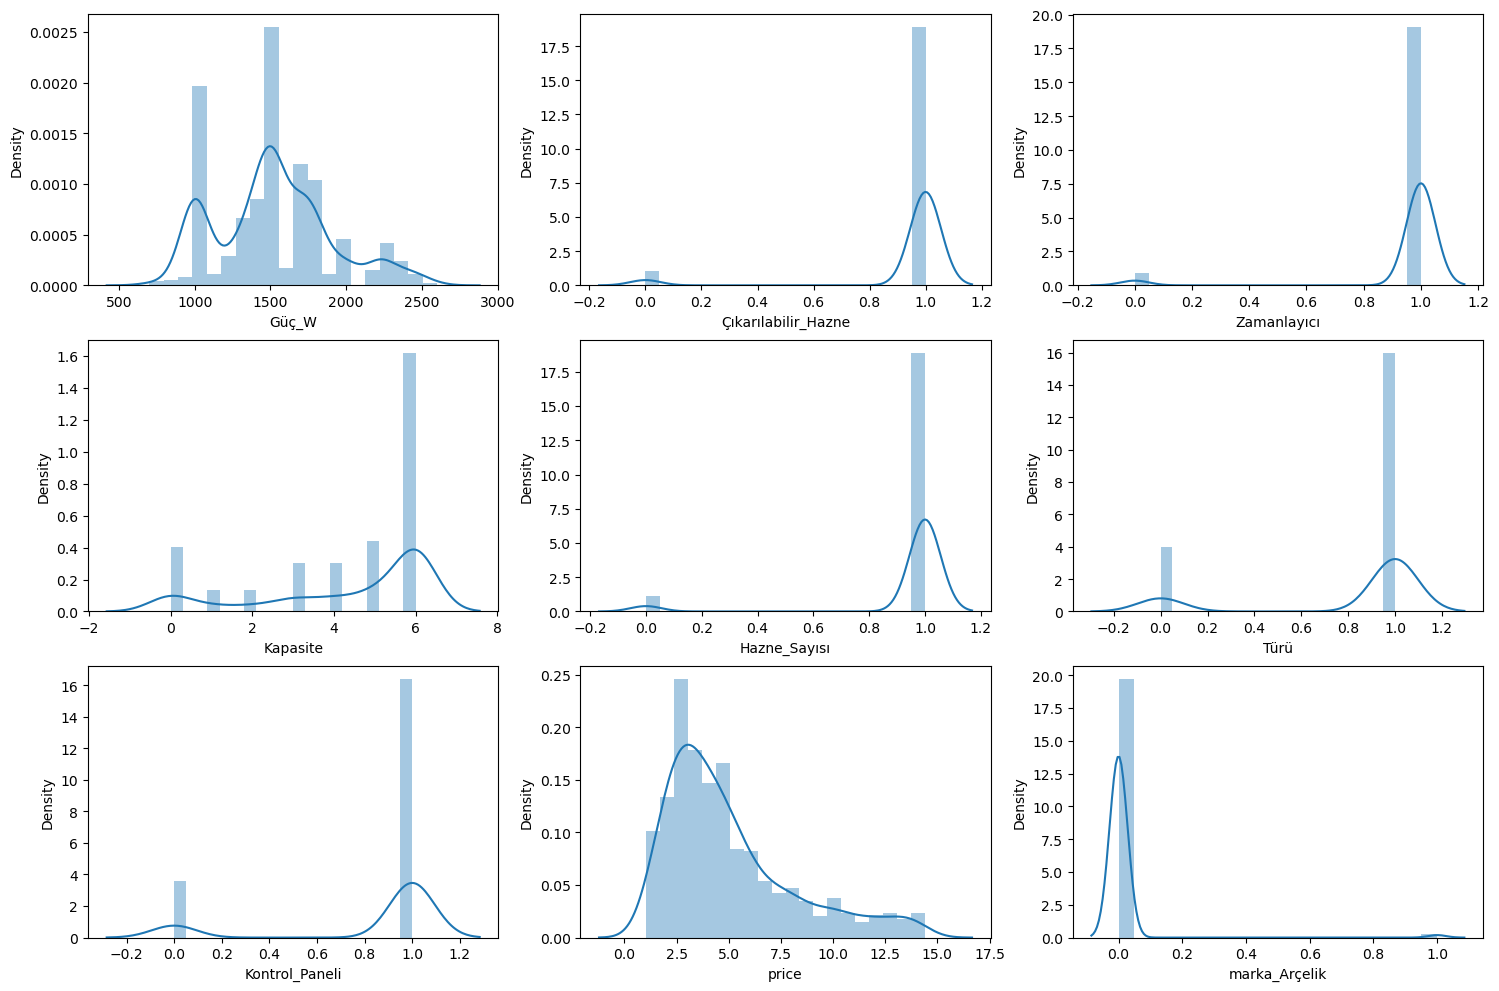

In [38]:
#Değişkenlerde veri nasıl dağılmış? Bu kodun detayını bilmek zorunda değiliz.. 
# Koda sadece kolonları veriypruz
# başka şekillerde de (histogram diye aratırsak...) yapılabiliyor

columns = ['Güç_W', 'Çıkarılabilir_Hazne', 'Zamanlayıcı', 'Kapasite',
       'Hazne_Sayısı', 'Türü', 'Kontrol_Paneli', 'price', 'marka_Arçelik',
       'marka_Diğer', 'marka_Goldmaster', 'marka_Karaca', 'marka_Kenwood',
       'marka_Kiwi', 'marka_Kumtel', 'marka_Onvo', 'marka_Philips',
       'marka_Schafer', 'marka_Tefal', 'marka_Wiami', 'marka_Xiaomi',
       'marka_Yasomi']


def distplot(nrows, ncols, columns):

    rows=nrows
    cols=ncols

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))

    columns = columns
    index=0

    for i in range(rows):
        for j in range(cols):
            sns.distplot(airfry[columns[index]], ax=ax[i][j], bins=20)
            index+=1

        
distplot(3, 3, columns)
# aşağıdaki uyarı mesajlarını görmek istemiyorsak yukarıda warning ile ilgili kodu 
# aktif edebiliriz

In [39]:
plt.figure(figsize=(15,7))
corr_matrix = airfry.corr()
corr_matrix['price'].sort_values(ascending=False)

price                  1.000000
marka_Philips          0.374954
marka_Tefal            0.231640
Güç_W                  0.225437
Kontrol_Paneli         0.147496
Çıkarılabilir_Hazne    0.086424
marka_Kenwood          0.056588
Zamanlayıcı            0.025363
marka_Arçelik          0.000758
Kapasite              -0.000540
marka_Karaca          -0.010343
marka_Wiami           -0.014415
Türü                  -0.035277
marka_Xiaomi          -0.038870
marka_Goldmaster      -0.049745
marka_Kiwi            -0.053693
marka_Schafer         -0.055586
marka_Onvo            -0.059609
marka_Yasomi          -0.074219
Hazne_Sayısı          -0.077053
marka_Kumtel          -0.087918
marka_Diğer           -0.214308
Name: price, dtype: float64

<Figure size 1500x700 with 0 Axes>

## Model aşaması

In [40]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import SelectKBest, f_classif, chi2
#from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
#Train Test Bölümlemeleri Oluşturalım
from sklearn.model_selection import train_test_split
X = airfry.drop(['price'], axis=1)
y = airfry['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

x_train : (887, 21)
x_test : (222, 21)
y_train : (887,)
y_test : (222,)


In [42]:
# Modelleri Denemek İçin Çağılarım (LinearRegression, Lasso)
from sklearn.linear_model import LinearRegression, Lasso

In [43]:
# Lineer Regresyon Train
lr = LinearRegression()
lr.fit(x_train,y_train)
# 
y_predict = lr.predict(x_test) # üretilen modeli (lr) test vverisi ile deneyelim
y_predict  #tahmin ettiği değerleri görelim

array([4.13692103, 4.05495605, 5.06041148, 4.94708359, 5.29444264,
       5.06041148, 4.62175106, 4.59023258, 3.25603972, 2.16861931,
       5.06041148, 4.81236089, 4.52513496, 5.03629635, 5.27989436,
       3.95503241, 4.91721653, 9.05948407, 3.63300742, 5.25921208,
       4.34670945, 4.34670945, 4.52045192, 5.0920328 , 5.29444264,
       9.10409045, 5.06041148, 9.10409045, 7.68430872, 3.63300742,
       8.02991351, 9.05948407, 4.34670945, 4.88198597, 5.06041148,
       5.01218122, 3.72222017, 6.20613308, 9.10409045, 4.94708359,
       4.94708359, 5.14962424, 3.8933979 , 9.10409045, 8.70263305,
       6.72550836, 5.25921208, 3.48269549, 4.59023258, 3.06074686,
       4.97119873, 5.25921208, 4.72042782, 5.4172625 , 4.88198597,
       2.70013593, 4.16961745, 4.52513496, 7.13524466, 3.12584448,
       5.29444264, 3.33778473, 5.29444264, 4.94708359, 5.56074982,
       4.85062306, 5.27989436, 4.7519463 , 4.41180707, 1.85812189,
       4.6553302 , 4.29187249, 7.45958548, 4.13692103, 4.58802

In [44]:
# metrikleri görelim
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  1.8565034074543303
 root mean squared error:  2.4252891325891706
Coefficient of determination R^2:  0.2705256082707368


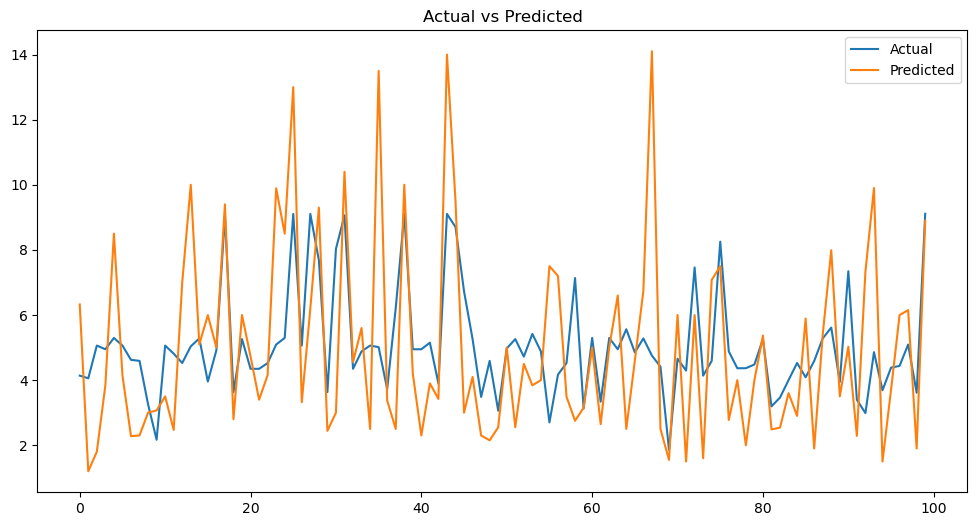

In [45]:
# Tahmin edilen değerler ile gerçek değerleri yanyana grafikte görelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  1.7417386744824246
root mean squared error:  2.8339833799558263
Coefficient of determination R^2:  0.003958102448235357


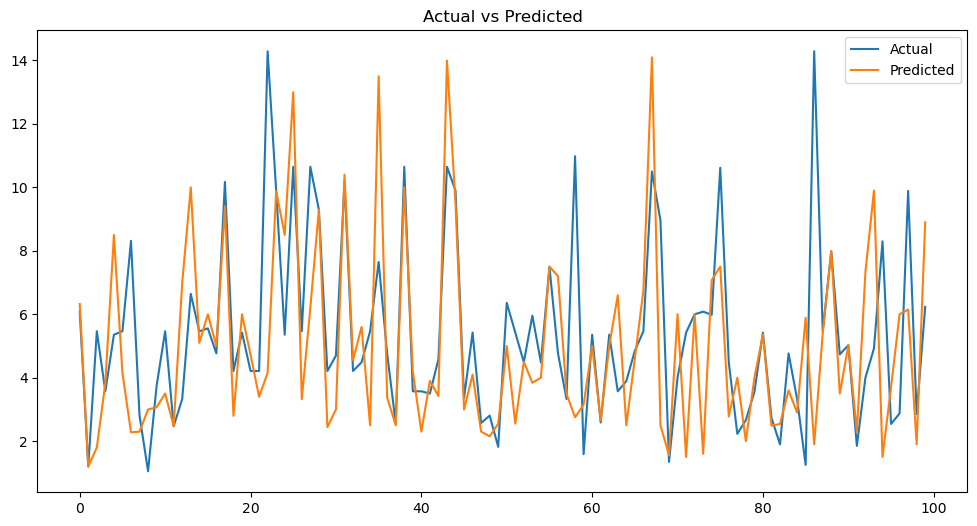

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion='squared_error', splitter='best')
dt.fit(x_train, y_train)

y_predict_dt = dt.predict(x_test)

print('mean absolute error: ', mean_absolute_error(y_test, y_predict_dt))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_predict_dt)))
print('Coefficient of determination R^2: ', r2_score(y_test, y_predict_dt))

fig = plt.figure(figsize=(12, 6))

result = pd.DataFrame({'Predicted': y_predict_dt, 'Actual': y_test})

result = result.reset_index()

result = result.drop(['index'], axis=1)

plt.plot(result[:100])

plt.legend(['Actual', 'Predicted'])

plt.title('Actual vs Predicted')

plt.show()


mean absolute error:  1.858801724639009
 root mean squared error:  2.4252667467953684
Coefficient of determination R^2:  0.27053907453150905


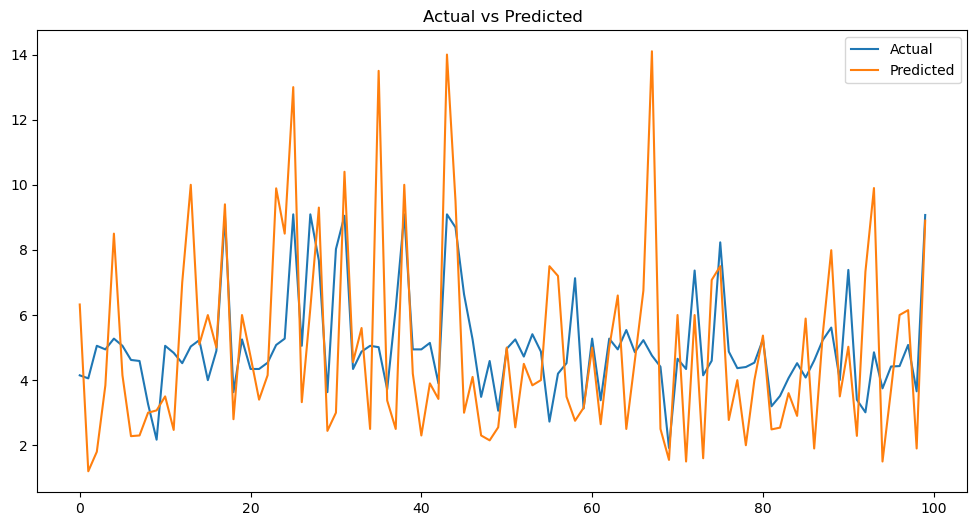

In [47]:
# Lasso regressyon için aynı uygulamayı yapalım 
lasso = Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
y_predict_lasso = lasso.predict(x_test) 
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

# Lasso İçin Tahmin Grafiği Çizelim
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

mean absolute error:  1.6603147169543722
root mean squared error:  2.3374502545828033
Coefficient of determination R^2:  0.32240879065426675


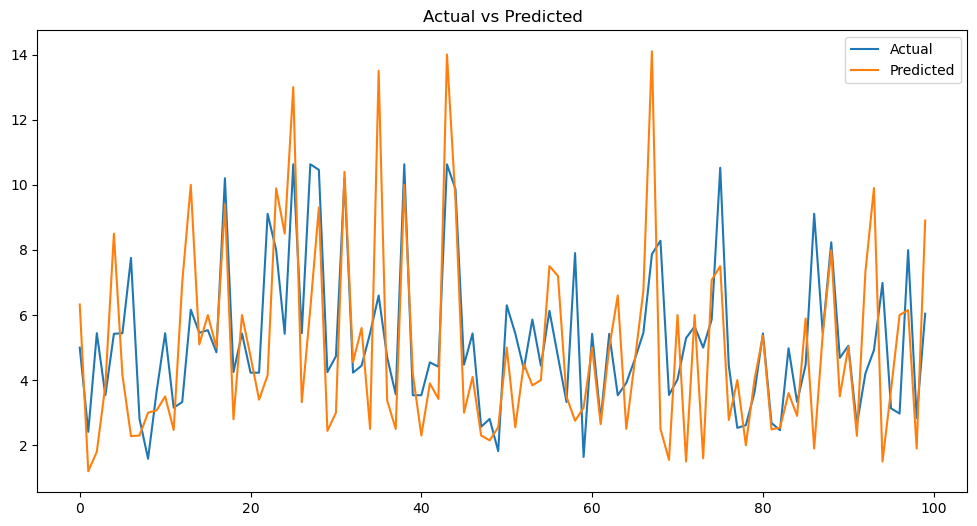

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = airfry.drop(['price'], axis=1)
y = airfry['price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# KNeighborsRegressor kullanımı
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(x_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = knn_regressor.predict(x_test)

# Regresyon modelinin performansını değerlendirelim
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6.41509019019019
R-squared: 0.2044164852156003


In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regresyon modelini oluştur
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_regressor.fit(x_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_gb = gb_regressor.predict(x_test)

# Regresyon modelinin performansını değerlendirelim
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R-squared:", r2_gb)

Gradient Boosting Mean Squared Error: 4.962603168696646
Gradient Boosting R-squared: 0.3845503096013644


In [51]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Verileri ölçeklendirme
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Support Vector Regresyon modelini oluştur
svr_regressor = SVR(kernel='linear', C=1.0)
svr_regressor.fit(x_train_scaled, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_svr = svr_regressor.predict(x_test_scaled)

# Regresyon modelinin performansını değerlendirelim
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regresyon Mean Squared Error:", mse_svr)
print("Support Vector Regresyon R-squared:", r2_svr)


Support Vector Regresyon Mean Squared Error: 6.15581466251057
Support Vector Regresyon R-squared: 0.2365711906824639


## Fine Tuning Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting için parametre ızgarası
params_grid_gb = {
    'n_estimators': [10, 50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 5, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Gradient Boosting Regresyon modeli
gb_regressor = GradientBoostingRegressor(random_state=0)

# Grid Search
grid_search_gb = GridSearchCV(gb_regressor, params_grid_gb, verbose=1, cv=3)
grid_search_gb.fit(x_train, y_train)

# En iyi parametreleri ve en iyi tahmin modelini görüntüleme
print("En iyi parametreler:", grid_search_gb.best_params_)
print("En iyi model:", grid_search_gb.best_estimator_)

# Test seti üzerinde tahmin yapma
y_pred_gb = grid_search_gb.best_estimator_.predict(x_test)

# Regresyon modelinin performansını değerlendirme
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R-squared:", r2_gb)


Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\Users\batur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\batur\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\batur\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\batur\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\batur\anaconda3\Lib\site-packag

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}
En iyi model: GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          n_estimators=500, random_state=0)
Gradient Boosting Mean Squared Error: 4.765613215842576
Gradient Boosting R-squared: 0.4089805131405928


## EN iyi model

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regresyon modelini oluştur
gb_regressor = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=0 ,max_features='sqrt')
gb_regressor.fit(x_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred_gb = gb_regressor.predict(x_test)

# Regresyon modelinin performansını değerlendirelim
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", mse_gb)
print("Gradient Boosting R-squared:", r2_gb)

Gradient Boosting Mean Squared Error: 4.785842069072769
Gradient Boosting R-squared: 0.4064717811234584


In [55]:
import joblib
joblib.dump(gb_regressor,"GradientBoostingRegressorModel5.pkl")

['C:/Users/batur/Desktop/MakineProje/Models/GradientBoostingRegressorModel5.pkl']